<h1> Example Group Spectral Differences </h1>
<p> First, we'll import the 'ML' module, to use its 'Classifier' class, os, </p>
<p> and TQDM, which is a handy pip-installable package that gives us nice loading bars. </p>
<p> We'll also import Standard, a module which allows us to perform several statistical methods on our data. </p>

In [42]:
import ML, Standard, os
from tqdm import tqdm
import config

<h2> Set your paths! </h2>
<p> 'patient_path' points to our 'condition-positive' dataset; in this example it points to spectral data in the 'ref pain' study folder, using the P300 task data, with 500-sample-long contig windows and all channels </p>
<p> 'reference_path' points to a folder containing healthy control data study folders </p>

<p> *note* this is just how I've opted to set them up for this particular example - you can load in many datasets to a Classifier object, since they are distinguished by the 'group' attribute of objects that come from the Prep module </p>

In [74]:
patient_path = "/wavi/EEGstudies/canlab pain/spectra/P300_250_1111111111111111111_0000000000110000000_1"
oth_patient_path = "/wavi/EEGstudies/canlab healthy/spectra/P300_250_1111111111111111111_0000000000110000000_1"
reference_path = "/wavi/EEGstudies"
filter_band = "nofilter"

<h3> Instantiate a 'Classifier' Object </h3>
<p> 'Classifier' takes one positional argument, currently either "spectra" or "contigs" </p>

In [75]:
myclf = ML.Classifier("spectra")

<h3> Load Patient (Condition-Positive) Data </h3>

In [76]:
for fname in tqdm(os.listdir(patient_path)):
    if filter_band in fname:
#         if fname[:4] not in config.exclude_subs:
        myclf.LoadData(patient_path+"/"+fname)

100%|██████████| 3370/3370 [00:07<00:00, 480.28it/s]


In [63]:
# for fname in tqdm(os.listdir(oth_patient_path)):
#     if filter_band in fname:
# #         if fname[:4] not in config.exclude_subs:
#         myclf.LoadData(oth_patient_path+"/"+fname)

<h3> Load Control (Condition-Negative) Data </h3>
<p> using the 'Balance' method of 'Classifier', the dataset will automatically add healthy control data found in the reference folders </p>
<p> *note* there are currently few scans in 81+ so it won't balance completely, and will not finish the loop. it's balanced within 1% or so </p> 

In [64]:
myclf.Balance(reference_path, filter_band="nofilter")

 1195 42002 shaped inconsistently with dataset.
Removing it from dataset.


<h3> Build 'SpectralAverage' </h3>
<p> takes one positional argument, an ML.Classifier object </p>

In [65]:
spec = Standard.SpectralAverage(myclf, lowbound=0, highbound=25)

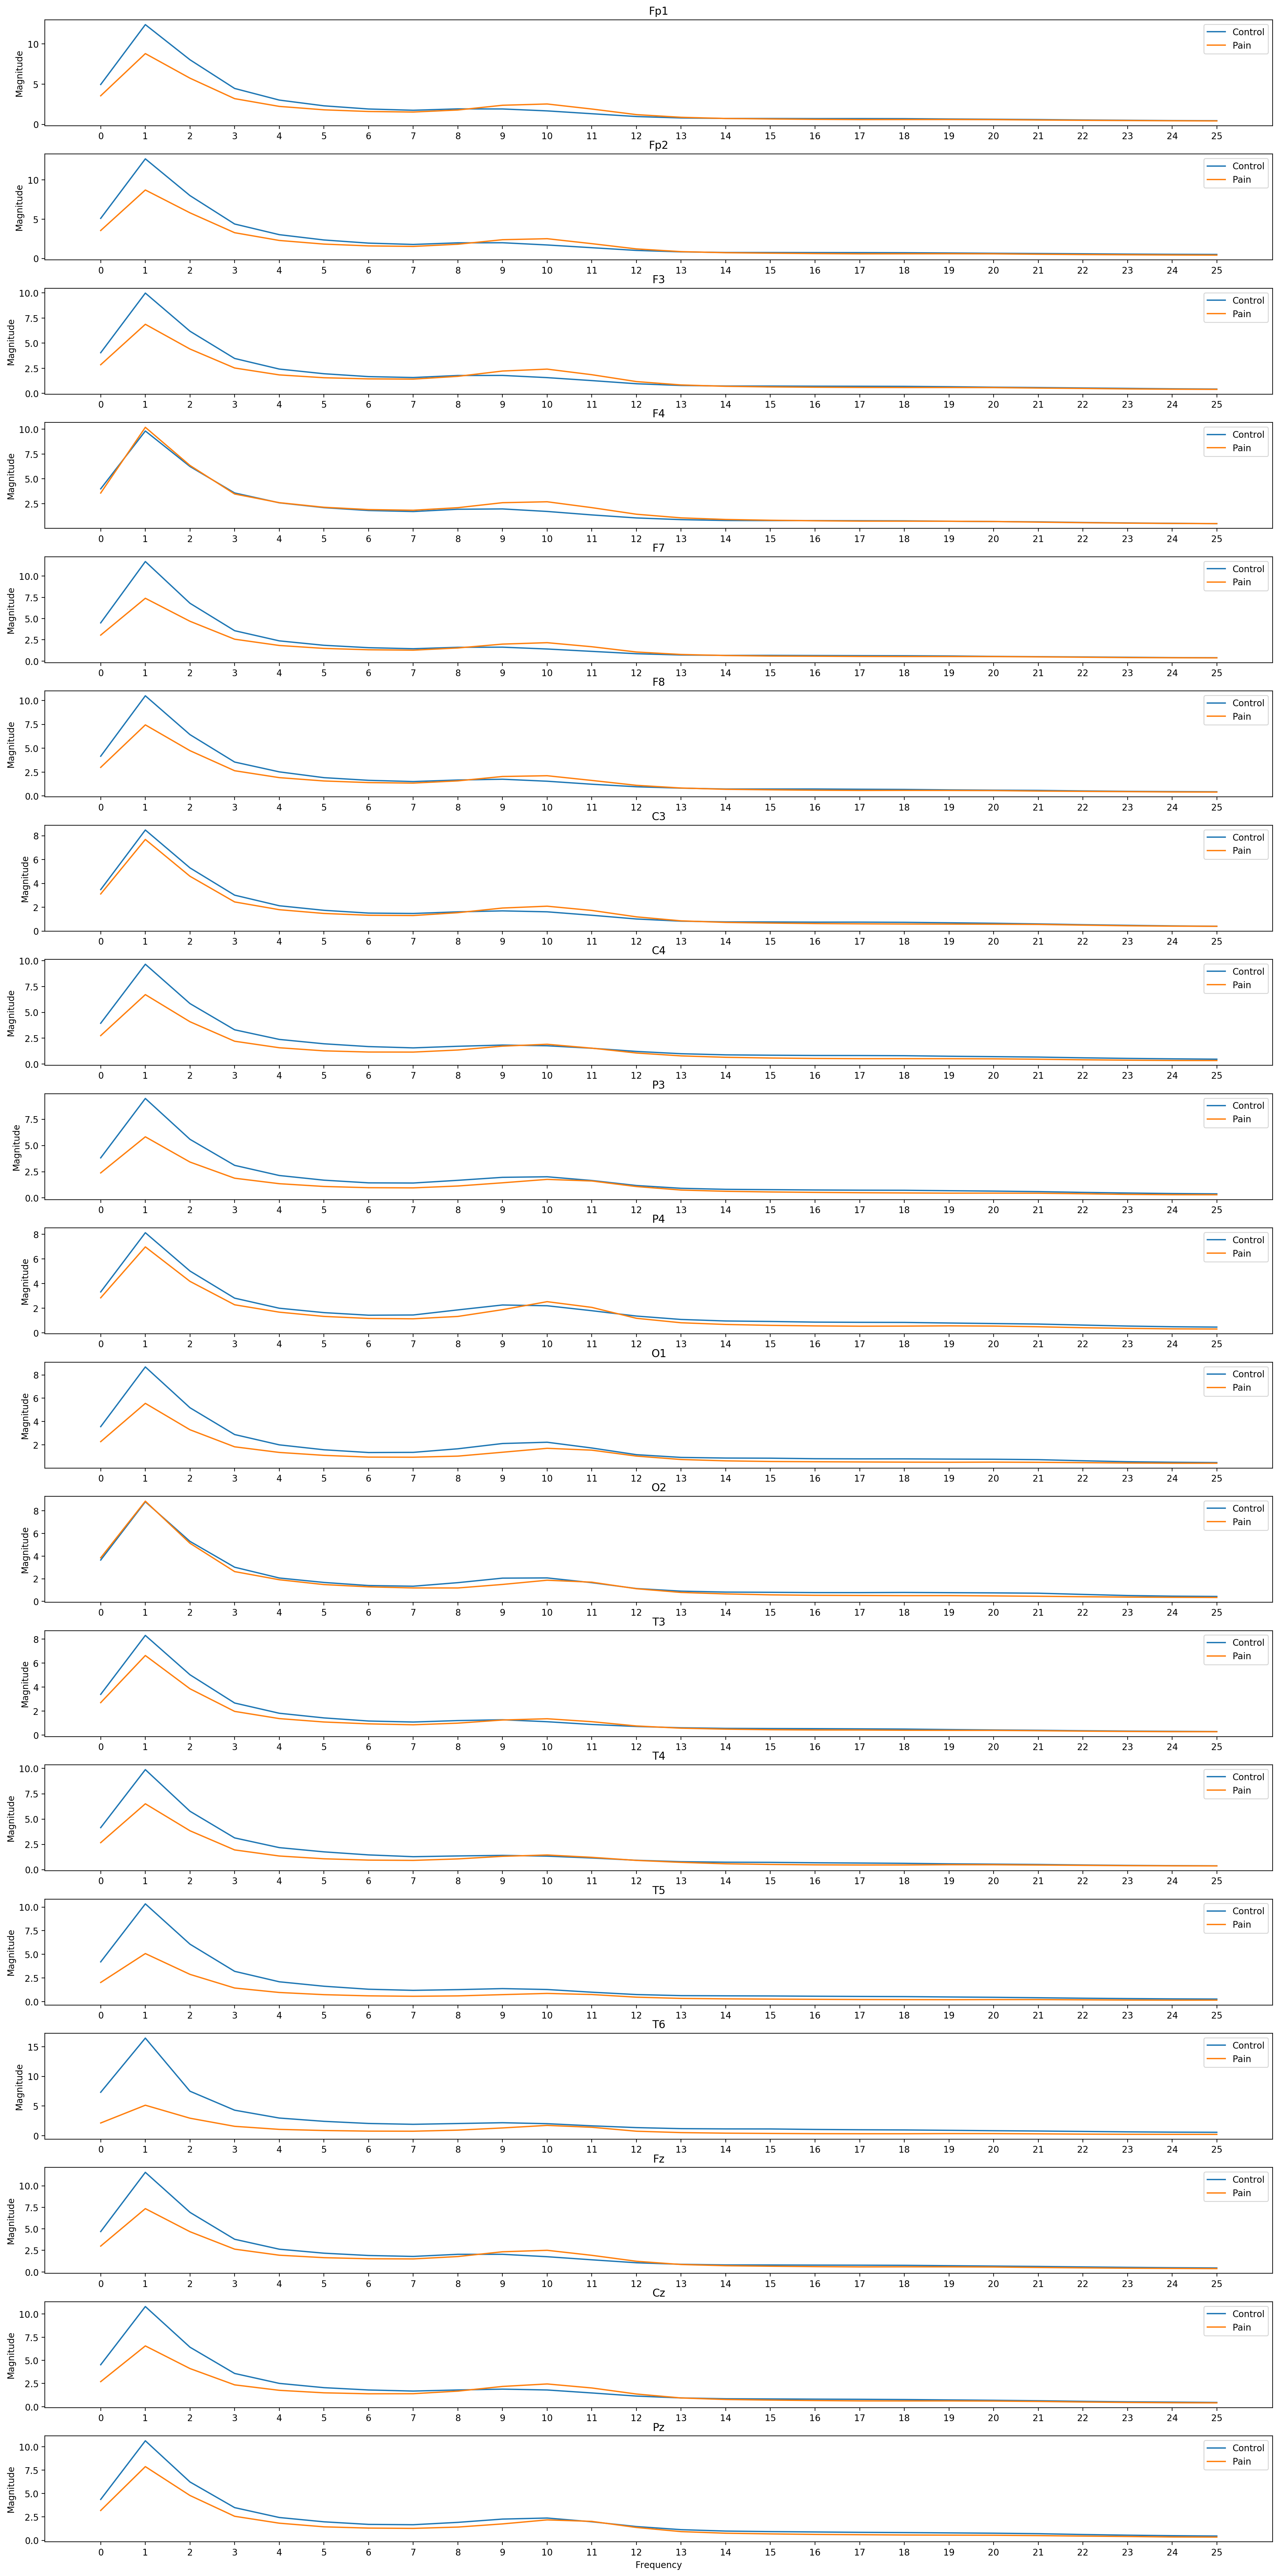

In [66]:
spec.plot(fig_fname="specavg_"+os.path.basename(patient_path))